In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv('month-kospi.csv')

In [3]:
X = data.index.values
XL = data.iloc[:, 0].values
X = X + 1 # index start from 1
Y = data.iloc[:, 1].values

In [4]:
XL

array(['2000. 02', '2000. 03', '2000. 04', '2000. 05', '2000. 06',
       '2000. 07', '2000. 08', '2000. 09', '2000. 10', '2000. 11',
       '2000. 12', '2001. 01', '2001. 02', '2001. 03', '2001. 04',
       '2001. 05', '2001. 06', '2001. 07', '2001. 08', '2001. 09',
       '2001. 10', '2001. 11', '2001. 12', '2002. 01', '2002. 02',
       '2002. 03', '2002. 04', '2002. 05', '2002. 06', '2002. 07',
       '2002. 08', '2002. 09', '2002. 10', '2002. 11', '2002. 12',
       '2003. 01', '2003. 02', '2003. 03', '2003. 04', '2003. 05',
       '2003. 06', '2003. 07', '2003. 08', '2003. 09', '2003. 10',
       '2003. 11', '2003. 12', '2004. 01', '2004. 02', '2004. 03',
       '2004. 04', '2004. 05', '2004. 06', '2004. 07', '2004. 08',
       '2004. 09', '2004. 10', '2004. 11', '2004. 12', '2005. 01',
       '2005. 02', '2005. 03', '2005. 04', '2005. 05', '2005. 06',
       '2005. 07', '2005. 08', '2005. 09', '2005. 10', '2005. 11',
       '2005. 12', '2006. 01', '2006. 02', '2006. 03', '2006. 

In [5]:
# 2nd order polynomial
pf = np.polyfit(X,Y,2)
f = np.poly1d(pf)

# logarithm function
logfit = np.polyfit(np.log(X), Y, 1)
f2 = logfit[0]*np.log(X) + logfit[1]

# curve fitting
# popt, pcov = curve_fit(func, X, Y)
logfit_scifit = curve_fit(lambda t,a: a*np.log(t)+Y[0],  X,  Y)
f2_scipy = logfit_scifit[0][0]*np.log(X) + Y[0]

expfit = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,  X,  Y,  p0=(-10, 0.01, 100))
f3 = expfit[0][0] * np.exp(expfit[0][1]*X) + expfit[0][2]

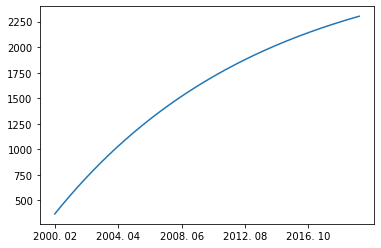

In [8]:
plt.plot(XL, f3)
plt.xticks(np.arange(0,250,50))
plt.show()

## 날짜 데이터 생성

In [9]:
from datetime import datetime, timedelta

start_date = datetime.strptime('200002', '%Y%m')
end_date = datetime.today()

In [10]:
start_date

datetime.datetime(2000, 2, 1, 0, 0)

In [11]:
end_date

datetime.datetime(2020, 4, 14, 18, 16, 32, 394995)

In [12]:
str_date_list = []

In [13]:
while start_date.strftime('%Y%m%d') != end_date.strftime('%Y%m%d'): 
    str_date_list.append(start_date.strftime('%Y%m%d'))
    start_date += timedelta(days=1)
print(str_date_list)

['20000201', '20000202', '20000203', '20000204', '20000205', '20000206', '20000207', '20000208', '20000209', '20000210', '20000211', '20000212', '20000213', '20000214', '20000215', '20000216', '20000217', '20000218', '20000219', '20000220', '20000221', '20000222', '20000223', '20000224', '20000225', '20000226', '20000227', '20000228', '20000229', '20000301', '20000302', '20000303', '20000304', '20000305', '20000306', '20000307', '20000308', '20000309', '20000310', '20000311', '20000312', '20000313', '20000314', '20000315', '20000316', '20000317', '20000318', '20000319', '20000320', '20000321', '20000322', '20000323', '20000324', '20000325', '20000326', '20000327', '20000328', '20000329', '20000330', '20000331', '20000401', '20000402', '20000403', '20000404', '20000405', '20000406', '20000407', '20000408', '20000409', '20000410', '20000411', '20000412', '20000413', '20000414', '20000415', '20000416', '20000417', '20000418', '20000419', '20000420', '20000421', '20000422', '20000423', '20

timedelta에는 달 단위가 없으므로 아래를 이용

In [44]:
from dateutil.relativedelta import relativedelta

str_date_list = []
start_date = datetime.strptime('200002', '%Y%m')
end_date = datetime.strptime('204002', '%Y%m')
while start_date.strftime('%Y%m') != end_date.strftime('%Y%m'): 
    str_date_list.append(start_date.strftime('%Y%m'))
    start_date = start_date + relativedelta(months=1)
print(str_date_list)

['200002', '200003', '200004', '200005', '200006', '200007', '200008', '200009', '200010', '200011', '200012', '200101', '200102', '200103', '200104', '200105', '200106', '200107', '200108', '200109', '200110', '200111', '200112', '200201', '200202', '200203', '200204', '200205', '200206', '200207', '200208', '200209', '200210', '200211', '200212', '200301', '200302', '200303', '200304', '200305', '200306', '200307', '200308', '200309', '200310', '200311', '200312', '200401', '200402', '200403', '200404', '200405', '200406', '200407', '200408', '200409', '200410', '200411', '200412', '200501', '200502', '200503', '200504', '200505', '200506', '200507', '200508', '200509', '200510', '200511', '200512', '200601', '200602', '200603', '200604', '200605', '200606', '200607', '200608', '200609', '200610', '200611', '200612', '200701', '200702', '200703', '200704', '200705', '200706', '200707', '200708', '200709', '200710', '200711', '200712', '200801', '200802', '200803', '200804', '200805',

In [45]:
datelen = len(str_date_list)

In [46]:
X2 = np.arange(1,datelen+1,1)

In [47]:
X2

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

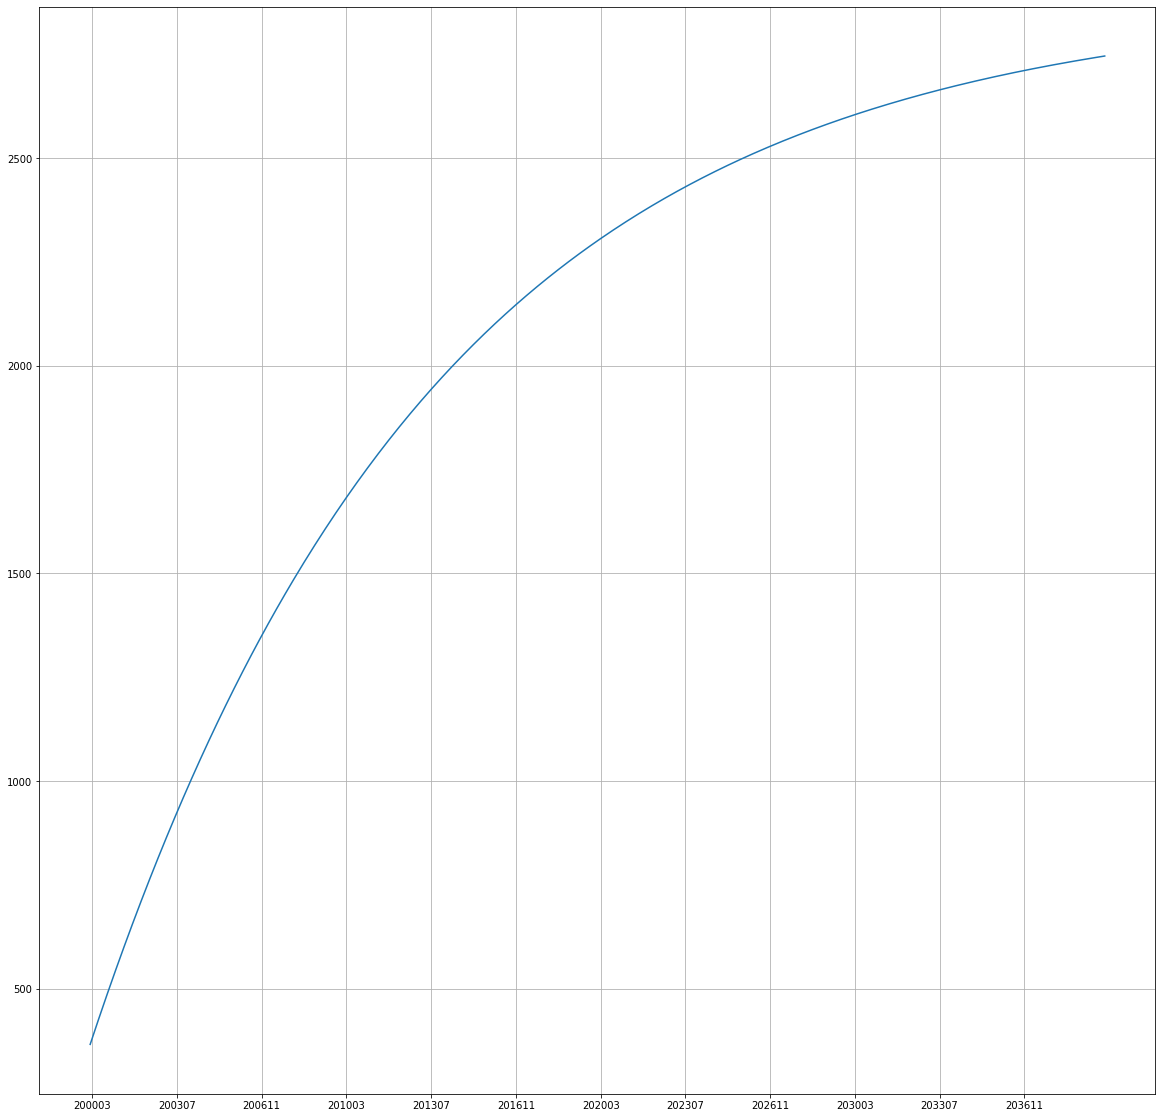

In [58]:
f3 = expfit[0][0] * np.exp(expfit[0][1]*X2) + expfit[0][2]
plt.plot(str_date_list, f3)
plt.xticks(np.arange(1,datelen+1,40))
plt.grid()
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()